# Chest X-rays 

Dataset from: https://stanfordmlgroup.github.io/competitions/chexpert/ 

What is CheXpert?
CheXpert is a large dataset of chest X-rays and competition for automated chest x-ray interpretation, which features uncertainty labels and radiologist-labeled reference standard evaluation sets.

Large, labeled datasets have driven deep learning methods to achieve expert-level performance on a variety of medical imaging tasks. We present CheXpert, a large dataset that contains 224,316 chest radiographs of 65,240 patients. We design a labeler to automatically detect the presence of 14 observations in radiology reports, capturing uncertainties inherent in radiograph interpretation. We investigate different approaches to using the uncertainty labels for training convolutional neural networks that output the probability of these observations given the available frontal and lateral radiographs. On a validation set of 200 chest radiographic studies which were manually annotated by 3 board-certified radiologists, we find that different uncertainty approaches are useful for different pathologies. We then evaluate our best model on a test set composed of 500 chest radiographic studies annotated by a consensus of 5 board-certified radiologists, and compare the performance of our model to that of 3 additional radiologists in the detection of 5 selected pathologies. On Cardiomegaly, Edema, and Pleural Effusion, the model ROC and PR curves lie above all 3 radiologist operating points. We release the dataset to the public as a standard benchmark to evaluate performance of chest radiograph interpretation models.

The goal:
* Create a deep learning system able to detect one or more of 14 conditions directly from one or more 
  chest X-rays.


## Setup

In [1]:
%matplotlib inline
from fastai.vision.all import *
from pathlib import Path

In [2]:
!pip install graphviz

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

## Get the Data

In [4]:
DATA = Path("../DAT255 - 2022")

The data was downloaded from the Standford ML group, and into the DATA directory:

In [5]:
import os
print (os.listdir(DATA)[0])

.ipynb_checkpoints


Unzipping the file:

In [6]:
import shutil
if not os.path.exists(DATA/'CheXpert-v1.0-small'):
    shutil.unpack_archive(DATA/'CheXpert-v1.0-small.zip', extract_dir=DATA)

## Explore the Data

In [7]:
trainData = pd.read_csv('CheXpert-v1.0-small/train.csv')

In [8]:
validData = pd.read_csv('CheXpert-v1.0-small/valid.csv')

In [9]:
trainData.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/view2_lateral.jpg,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/view1_frontal.jpg,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


What do the numbers mean?
* NaN for unmentioned
* 0 for negative
* -1 for uncertain
* 1 for positive

Looking at the three first images:

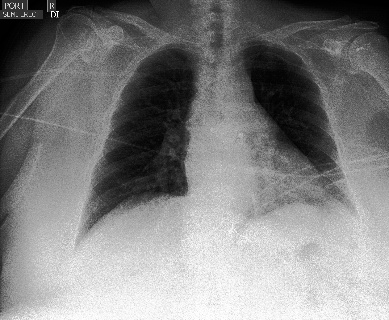

In [10]:
img=load_image('CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg')
img

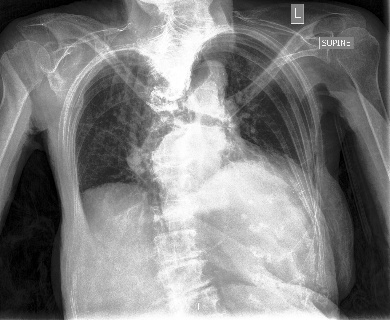

In [11]:
img=load_image('CheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg')
img

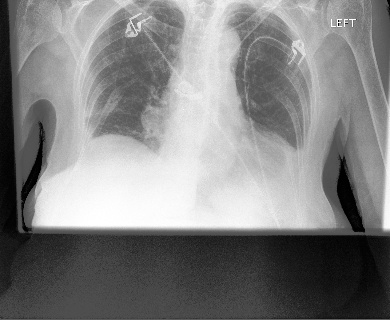

In [12]:
img=load_image('CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg')
img

In [16]:
img.shape

(320, 390)

Checking number of rows, attribute types and number of non-null values by using info().

In [13]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13  Atelectasis   

In [14]:
validData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Path                        234 non-null    object 
 1   Sex                         234 non-null    object 
 2   Age                         234 non-null    int64  
 3   Frontal/Lateral             234 non-null    object 
 4   AP/PA                       202 non-null    object 
 5   No Finding                  234 non-null    float64
 6   Enlarged Cardiomediastinum  234 non-null    float64
 7   Cardiomegaly                234 non-null    float64
 8   Lung Opacity                234 non-null    float64
 9   Lung Lesion                 234 non-null    float64
 10  Edema                       234 non-null    float64
 11  Consolidation               234 non-null    float64
 12  Pneumonia                   234 non-null    float64
 13  Atelectasis                 234 non

Using describe() to get some insight into the numerical attributes. 

In [15]:
trainData.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.000000,22381.0,44839.000000,46203.000000,117778.000000,11944.000000,85956.000000,70622.000000,27608.000000,68443.000000,78934.000000,133211.000000,6492.000000,12194.000000,123217.000000
mean,60.430653,1.0,-0.035795,0.409346,0.848911,0.644508,0.456769,-0.183498,-0.461134,-0.005304,0.206540,0.559706,0.134011,0.688699,0.932680
std,17.820925,0.0,0.718442,0.769323,0.472571,0.691607,0.741785,0.753980,0.828249,0.990244,0.493529,0.648859,0.966183,0.565435,0.283377
min,0.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,1.0,-1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
50%,62.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,74.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
